> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: The Movie Database TMDb

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
THE aim of this project is to use data analysis such as wrangling, cleaning and visualization for our dataset ( data to answer some questions like.. - Which    genres are most popular from year to year? What kinds of properties are associated with movies that have high revenues? 
- what are the Characteristics of shared low-income films..?
- what is the Voting rate for films with highest and lower years ?
- The correlation of voting for the films with the lowest earnings
- The hieghest and lowest revenue with name of movie
- and some analysis
- This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.



In [4]:
# load some libraries to data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#load library to more visualization
import seaborn as sns
# it make background of our visualization more confortable
sns.set_style('darkgrid')

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [8]:
#load dataset and show some rows
DATA = pd.read_csv('C:/Users/20114/Desktop/project/tmdb-movies.csv')
DATA.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


## Data Assessing

In [10]:
# Show Some Statistics Information
DATA.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


* HERE IS THE MORAL:
* * The Max revenue is 2.781506e+09 
* * The Oldest Films were in 1960 And the new is 2015


In [11]:
# show Numbers of rows And columns
DATA.shape

(10866, 21)

In [12]:
# Show some information About the dataset
DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

* It seems there are some missing values here



### Data Cleaning 

In [13]:
# Drop the columns that we won't need ( NOT IMPORTANT) 
DATA.drop(['id' , 'imdb_id' , 'cast' , 'homepage' , 'keywords' , 'director' , 'tagline' , 'overview' , 'production_companies'] , axis = 1 , inplace = True)

In [14]:
# The new Data (after deleting columns)
DATA.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [15]:
# show rows with Duplicated values
sum(DATA.duplicated())

1

*  Unfortunately, There is one row with duplicated values

In [16]:
# Remove duplicated values
DATA.drop_duplicates(inplace = True)

In [17]:
# Check The data after removing duplicated
sum(DATA.duplicated())

0

In [18]:
# Chek numbers of null values
DATA.isnull().sum()

popularity         0
budget             0
revenue            0
original_title     0
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

* There are some missing values, so we gonna drop it (they won't affect OUR dataset)

In [19]:
# Drop some missing value
DATA.dropna(inplace = True)

In [20]:
# Chek Numbers of null values
DATA.isnull().sum()

popularity        0
budget            0
revenue           0
original_title    0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

* FINALLY, We did not have ANY missing values

### HERE, we converting ZEROS value to THE mean of it's column

In [21]:
# First, convert zeros to NaN value
DATA['revenue'].replace([0], np.NaN, inplace= True)

In [22]:
# Then, Use mean instead of NaN
mean = DATA['revenue'].mean()
DATA['revenue'].fillna(mean , inplace= True)

In [23]:
# After that, convert zeros to NaN value
DATA['budget'].replace([0], np.NaN, inplace= True)

In [24]:
# AND use mean instead of NaN
mean = DATA['budget'].mean()
DATA['budget'].fillna(mean , inplace= True)

In [25]:
# Repeat the above steps, convert zeros to NaN value
DATA['budget_adj'].replace([0], np.NaN, inplace= True)

In [26]:
# THEN use mean instead of NaN
mean = DATA['budget_adj'].mean()
DATA['budget_adj'].fillna(mean , inplace= True)

In [27]:
# Also, convert zeros to NaN value
DATA['revenue_adj'].replace([0], np.NaN, inplace= True)

In [30]:
# THEN, use mean instead of NaN
mean = DATA['revenue_adj'].mean()
DATA['revenue_adj'].fillna(mean , inplace= True)

In [31]:
# FINALLY,check our dataset have no zero
DATA.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10842.000000,1.084200e+04,1.084200e+04,10842.000000,10842.000000,10842.000000,10842.000000,1.084200e+04,1.084200e+04
mean,0.647461,3.074552e+07,8.923886e+07,102.138443,217.823649,5.974064,2001.314794,3.689620e+07,1.151009e+08
std,1.001032,2.685958e+07,1.083868e+08,31.294612,576.180993,0.934257,12.813617,2.896940e+07,1.329795e+08
min,0.000065,1.000000e+00,2.000000e+00,0.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,0.208210,1.900000e+07,4.091286e+07,90.000000,17.000000,5.400000,1995.000000,2.445229e+07,5.840647e+07
50%,0.384532,3.074552e+07,8.923886e+07,99.000000,38.000000,6.000000,2006.000000,3.689620e+07,1.151009e+08
75%,0.715393,3.074552e+07,8.923886e+07,111.000000,146.000000,6.600000,2011.000000,3.689620e+07,1.151009e+08
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [32]:
# Split genres column
DATA['genres'].str.split('|', n= 1, expand= True)

,0,1
0,Action,Adventure|Science Fiction|Thriller
1,Action,Adventure|Science Fiction|Thriller
2,Adventure,Science Fiction|Thriller
3,Action,Adventure|Science Fiction|Fantasy
4,Action,Crime|Thriller
...,...,...
10861,Documentary,None
10862,Action,Adventure|Drama
10863,Mystery,Comedy
10864,Action,Comedy


In [25]:
# Here we named split column
DATA.rename(columns= {0: 'new_genres' , 1: 'not_need'}, inplace= True)

In [34]:
# Adding this columns to our dataset by its NEW features
DATA[['new_genres' , 'not_need']]= DATA.genres.str.split('|',n= 1, expand= True)

In [35]:
# Check THE New dataset after adding
DATA.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,new_genres,not_need
0,32.985763,150000000.0,1.513529e+09,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Adventure|Science Fiction|Thriller
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Action,Adventure|Science Fiction|Thriller
2,13.112507,110000000.0,2.952382e+08,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure,Science Fiction|Thriller
3,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,Action,Adventure|Science Fiction|Fantasy
4,9.335014,190000000.0,1.506249e+09,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,Action,Crime|Thriller


In [36]:
# Drop genres and not need columns
DATA.drop(['genres', 'not_need'], axis= 1, inplace= True)

In [29]:
# Change new_genres column to genres
DATA.rename(columns={'new_genres' : 'genres'}, inplace= True)

In [37]:
# check the NEWLY dataset
DATA.head()

,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,new_genres
0,32.985763,150000000.0,1.513529e+09,Jurassic World,124,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Action
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,120,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Action
2,13.112507,110000000.0,2.952382e+08,Insurgent,119,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure
3,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,136,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,Action
4,9.335014,190000000.0,1.506249e+09,Furious 7,137,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,Action


## Exploratory Data Analysis


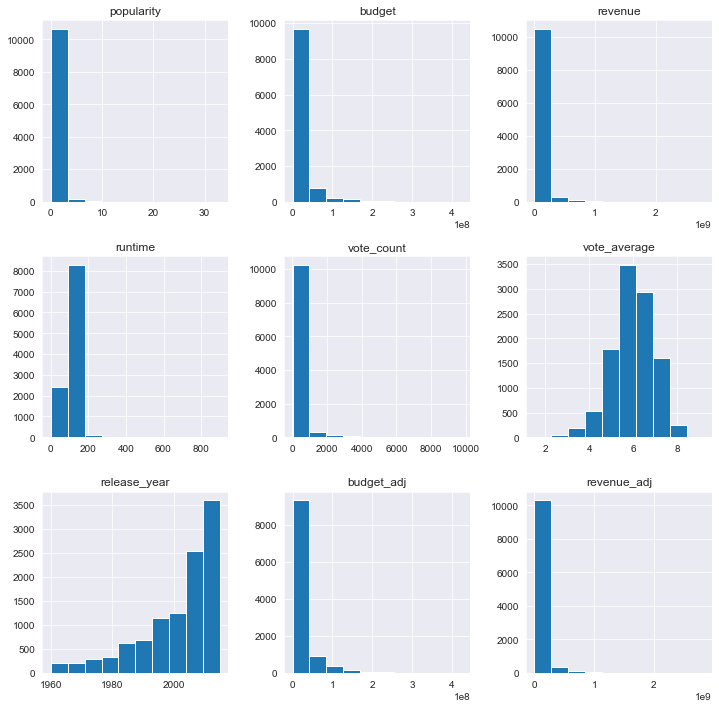

In [38]:
# DRAW histogram to our columns in dataset 
DATA.hist(figsize = (12,12));

* Producer Hieghest Increase maybe FROM (2010 - 2015).
* AND, THE more  THE years passed, the more the produced movies are .
* THE Most average votes are Ranged from almost 5.3 to 6.1 .
* Most Runtime of movies are maybe FROM 160 to 190 minutes  , AND The least of movies is more than 210 minutes
* Most of THE histograms not showing the excactly values, bacaues there is some zeros value in for example 
* : (Runtime .. Revenue ..Revenue_adj .. )

## HIGHEST and LOWEST revenue with THE name of movie 

In [39]:
# Show the max revenue
DATA['revenue'].max()

2781505847.0

In [40]:
# Show the min revenue
DATA[DATA['revenue'] != 0].min()

popularity        0.000065
budget                 1.0
revenue                2.0
original_title    $5 a Day
runtime                  0
release_date        1/1/00
vote_count              10
vote_average           1.5
release_year          1960
budget_adj        0.921091
revenue_adj       2.370705
new_genres          Action
dtype: object

* There is something Not logical, there is a film with zero revenue

In [41]:
# Get record with high revenue
DATA[DATA['revenue'] == 2781505847]

,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,new_genres
1386,9.432768,237000000.0,2.781506e+09,Avatar,162,12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09,Action


* THE hieghest revenue is 2781505847 AND it was for the 'Avata' movie in 2009
* THE lowest revenue is 2 AND it was for the '71 movie

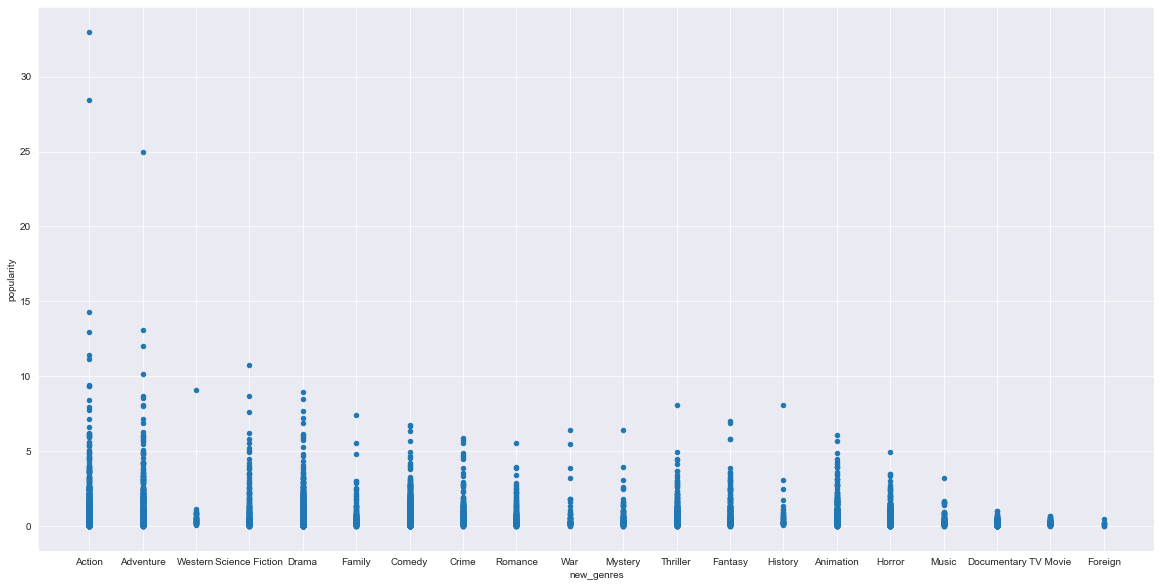

In [48]:
# Show the correlation betweem genres and popularity
DATA.plot(x = 'new_genres' , y = 'popularity' , kind = 'scatter' , figsize = (20,10));

* THE most TWO popularity movies are (Action , Adventure) 
* THE least TWO popularity movies are (Foreign , TV Movie)

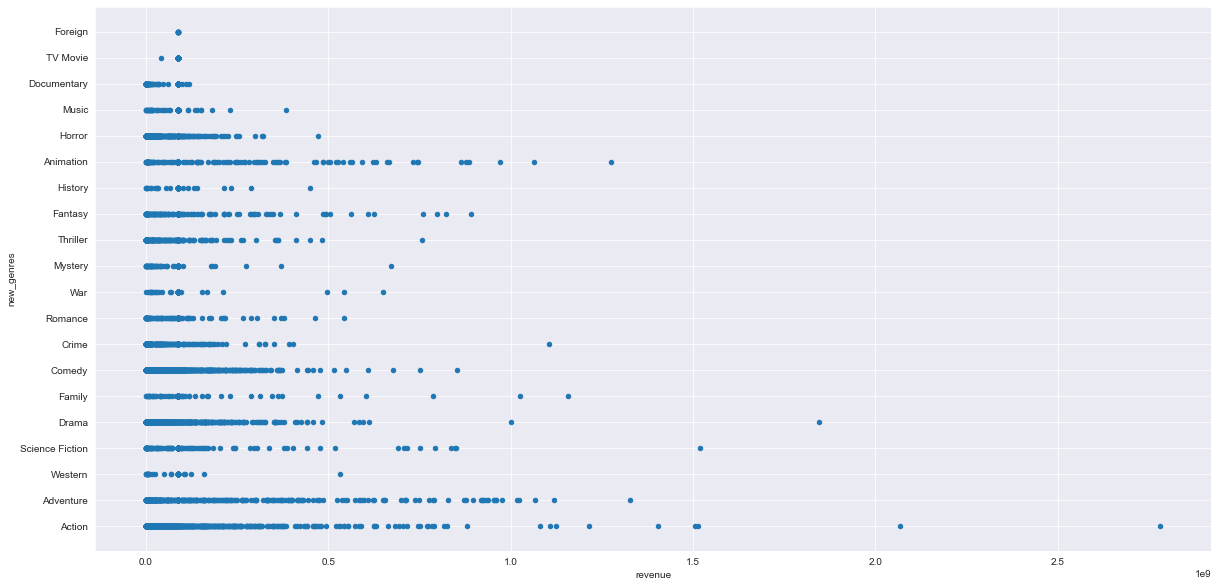

In [49]:
# correlation betweem revenue and genres
DATA.plot(x = 'revenue' , y = 'new_genres' , kind = 'scatter' , figsize = (20,10));

* THE HIGHEST two revenue movies are (Action , Adventure) 
* THE LOWEST two revenue movies are (Foreign , TV Movie)

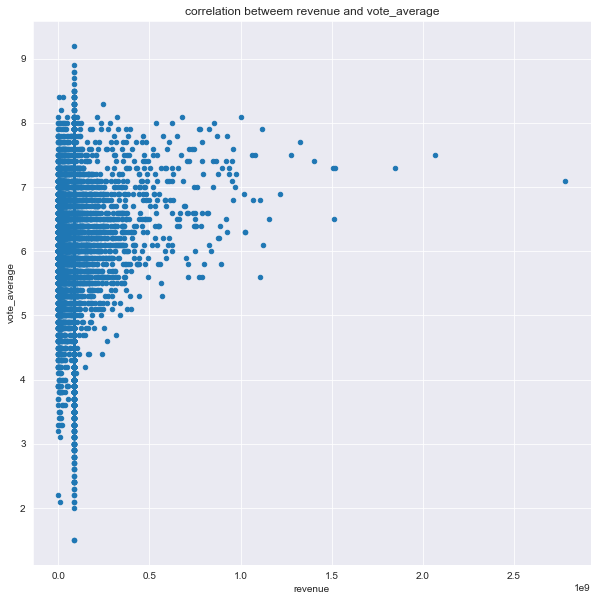

In [50]:
# correlation betweem revenue and vote_average
DATA.plot(x = 'revenue' , y = 'vote_average' , kind = 'scatter' , figsize = (10,10) , title = 'correlation betweem revenue and vote_average');

* SUCH a noisy correlation, we can't know the correct answer now 

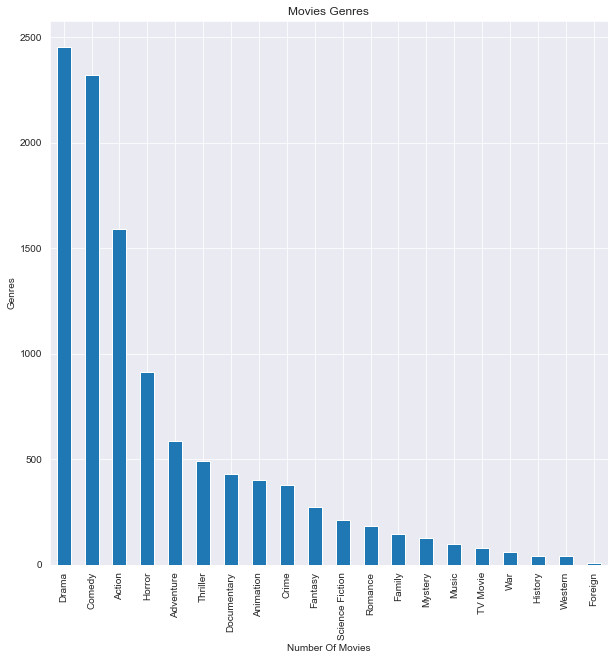

In [55]:
# draw a bar chart for movie genres
DATA['new_genres'].value_counts().plot(ylabel= 'Genres', xlabel= 'Number Of Movies', kind= 'bar', figsize= (10,10), title = 'Movies Genres');

* THE MOST ATRACTIVE genre movie in our dataset is 'Drama' 
* THE LEAST ATRACTIVE genre movie in our dataset is 'Foreign' 

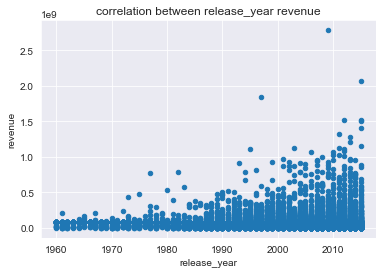

In [53]:
# SHOW the correlation between release_year revenue
DATA.plot(x = 'release_year' , y = 'revenue' , kind = 'scatter' , title = 'correlation between release_year revenue');

* IT'S somehow noisy but..
* IN 1960 to 1970 wa can say its THE smallest revenue..
* IN 2010 to 2015 wa can say its THE largest revenue..

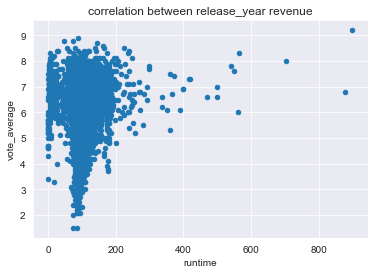

In [54]:
# to see correlation between release_year revenue
DATA.plot(x = 'runtime' , y = 'vote_average' , kind = 'scatter' , title = 'correlation between release_year revenue');

* HERE WE CAN'T SEE ANY CORRELATION 

<a id='conclusions'></a>
## Conclusions

* FINALLY, we cleaned the data without affecting our dataset
* THE MOST ATRACTIVE kind of movies is 'Drama' and THE least is 'Foreign'
* THE HIGHEST revenue was 2781505847 , Action movie, named 'Avatar'
* least  revenue was 2 with no zero revenue its Action movie and named ' '7 '
* THE most runtime of our movies IN the dataset was between 170 to 190 minutes , and no correlation between it and voting
* we can say that there is A BIG correlation between more year and revenue .

### Limitations 
* IN our dataset there ARE more values with zeros, and it makes the visualization sometimes not clear .
* IT was important to have a correlation between voting and runtime of movie to focus on this limit time .